**This notebook accompanies the preprocessing step of the pipeline.**

In [12]:
import ops
from ops.imports_ipython import *
import pickle 
import glob
import pickle
import tifffile
from microfilm import microplot
from microfilm.microplot import Micropanel

# Set screen directories
parse_function_home = "/lab/barcheese01/screens"
parse_function_dataset = "baker"

# Set home directory as a combination of parse_function_home and parse_function_dataset
home = os.path.join(parse_function_home, parse_function_dataset)

# Set number of wells
well_num = 6

# Set number of cycles
cycle_num = 9

# Set test well
test_well = "A1"

# Set test cycle 
test_cycle = "c4"

# Set tested matching images
initial_sites = [(1,1),(186,50),(548,150),(656,174),(887,225),(1279,331)]
ph_tiles = [coord[0] for coord in initial_sites]
sbs_tiles = [coord[1] for coord in initial_sites]

### Check if metadata file generation went to plan:

In [13]:
# Calculate the total number of expected metadata files
expected_files = well_num + (cycle_num * well_num)

# Calculate the total number of metadata files
metadata_directory = os.path.join(home, "metadata")
files = [file for file in os.listdir(metadata_directory) if file.endswith('.pkl')]
num_files = len(files)

# Split files into 20X and 10X pickle files
files_ph = [file for file in files if '20X' in file]
files_sbs = [file for file in files if '10X' in file]
                
print("Expected number of metadata files:", expected_files)
print("Number of metadata files:", num_files)

Expected number of metadata files: 60
Number of metadata files: 60


### Check if multidimensional tiffs were properly generated:

In [14]:
total_row_count = 0

# Iterate over each 20X file
for file_ph in files_ph:
    # Construct the full file path
    file_path = os.path.join(home, "metadata", file_ph)
    
    # Open the PKL file in binary mode
    with open(file_path, 'rb') as file:
        # Load the data from the PKL file
        data = pickle.load(file)
        
        # Assuming data is a pandas DataFrame, get the number of rows and add it to the total row count
        total_row_count += len(data)  # Assuming 'data' is a pandas DataFrame

# Print the total row count
print("Total number of metadata rows in all ph files:", total_row_count)

# Use glob to find all TIFF files in the directory
ph_tiff_files = glob.glob(os.path.join(home, "input_ph/process/input/20X/multidimensional", "*.tif"))

# Count the number of TIFF files
num_ph_tiff_files = len(ph_tiff_files)

# Print the total number of TIFF files
print("Total number of TIFF ph files:", num_ph_tiff_files)

Total number of metadata rows in all ph files: 7686
Total number of TIFF ph files: 7686


In [15]:
total_row_count = 0

# Iterate over each 10X file
for file_sbs in files_sbs:
    # Construct the full file path
    file_path = os.path.join(home, "metadata", file_sbs)
    
    # Open the PKL file in binary mode
    with open(file_path, 'rb') as file:
        # Load the data from the PKL file
        data = pickle.load(file)
        
        # Assuming data is a pandas DataFrame, get the number of rows and add it to the total row count
        total_row_count += len(data)  # Assuming 'data' is a pandas DataFrame

# Print the total row count
print("Total number of metadata rows in all sbs files:", total_row_count)

# Use glob to find all TIFF files in the directory
sbs_tiff_files = glob.glob(os.path.join(home, "input_sbs/process/input/10X/multidimensional", "*.tif"))

# Count the number of TIFF files
num_sbs_tiff_files = len(sbs_tiff_files)

# Print the total number of TIFF files
print("Total number of TIFF files:", num_sbs_tiff_files)

Total number of metadata rows in all sbs files: 17982
Total number of TIFF files: 17982


### Generate images of metadata, and check if initial sites is a logical choice

In [16]:
# Iterate through the files in files_ph
for file in files_ph:
    # Check if the file contains the test_well in its name
    if test_well in file:
        # Open the file and load the metadata
        with open(os.path.join(home, "metadata", file), 'rb') as f:
            ph_test_metadata = pickle.load(f)
        break

# Iterate through the files in files_sbs
for file in files_sbs:
    # Check if the file contains the test_well and test_cycle in its name
    if test_well in file and test_cycle in file:
        # Open the file and load the metadata
        with open(os.path.join(home, "metadata", file), 'rb') as f:
            sbs_test_metadata = pickle.load(f)
        break

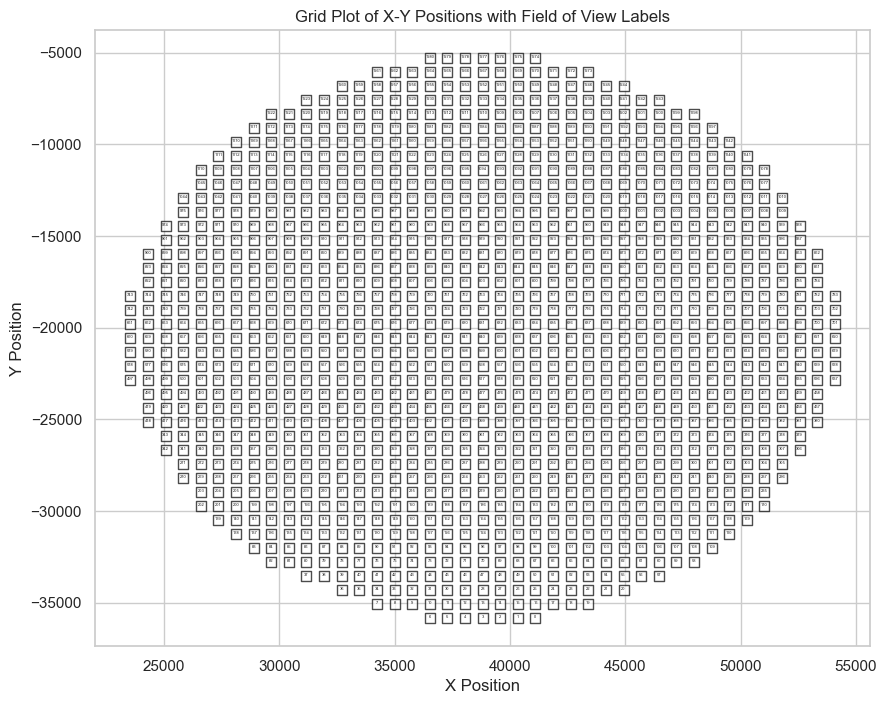

In [17]:
# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(10, 8))

# Scatter plot with squares for each point
plt.scatter(ph_test_metadata['x_data'], ph_test_metadata['y_data'], s=50, c='white', marker='s', edgecolors='black', linewidths=1, alpha=0.7)

# Label each point with the 'field_of_view' variable
for i, txt in enumerate(ph_test_metadata['field_of_view']):
    plt.annotate(txt, (ph_test_metadata['x_data'].iloc[i], ph_test_metadata['y_data'].iloc[i]), textcoords="offset points", xytext=(0,0), ha='center', fontsize = 3)

# Set labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Grid Plot of X-Y Positions with Field of View Labels')

# Set the resolution (dpi)
dpi = 1000  

# Save the figure with high resolution
plt.savefig(os.path.join(home, "metadata", "ph_metadata_example.png"), dpi=dpi)

# Display the plot (optional)
plt.show()

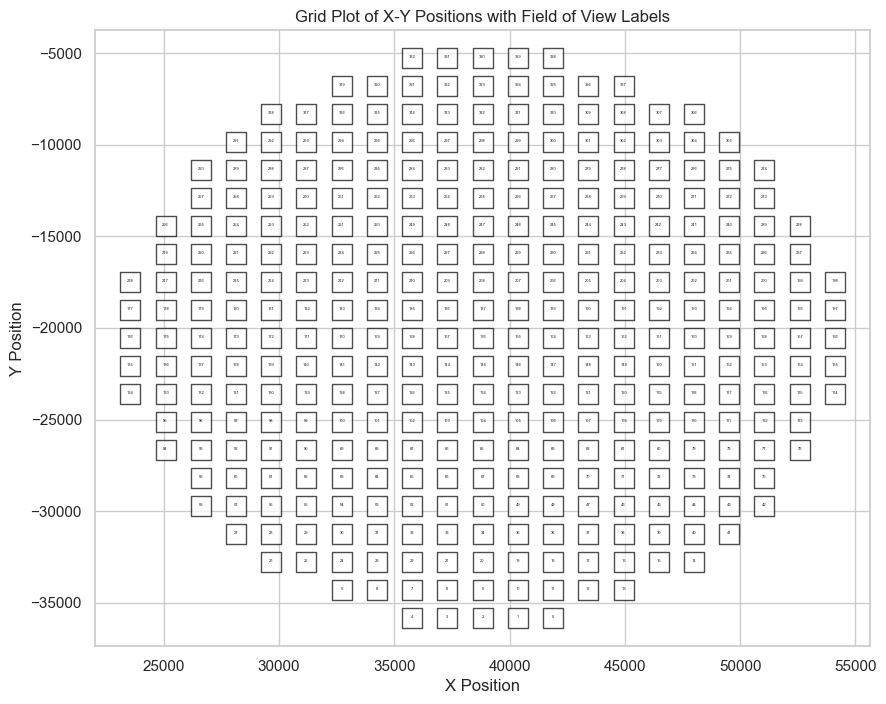

In [18]:
# Set the style for better aesthetics (optional)
sns.set(style="whitegrid")

# Create a new figure
plt.figure(figsize=(10, 8))

# Scatter plot with squares for each point
plt.scatter(sbs_test_metadata['x_data'], sbs_test_metadata['y_data'], s=200, c='white', marker='s', edgecolors='black', linewidths=1, alpha=0.7)

# Label each point with the 'field_of_view' variable
for i, txt in enumerate(sbs_test_metadata['field_of_view']):
    plt.annotate(txt, (sbs_test_metadata['x_data'].iloc[i], sbs_test_metadata['y_data'].iloc[i]), textcoords="offset points", xytext=(0,0), ha='center', fontsize = 3)

# Set labels and title
plt.xlabel('X Position')
plt.ylabel('Y Position')
plt.title('Grid Plot of X-Y Positions with Field of View Labels')

# Set the resolution (dpi)
dpi = 1000  

# Save the figure with high resolution
plt.savefig(os.path.join(home, "metadata", "sbs_metadata_example.png"), dpi=dpi)

# Display the plot (optional)
plt.show()

In [19]:
filtered_ph_test_metadata = ph_test_metadata[ph_test_metadata['field_of_view'].isin(ph_tiles)]
filtered_ph_test_metadata

x_data   y_data   z_data  pfs_offset  field_of_view  \
4     40336.7 -35853.2  2933.84        9506              1   
744   38809.4 -29743.0  2924.12        9506            186   
2192  46447.1 -22105.1  2916.68        9506            548   
2624  26588.8 -20577.5  2923.58        9506            656   
3548  34226.5 -15994.8  2912.84        9506            887   
5116  37281.8  -5301.9  2913.10        9506           1279   

                                               filename  
4     /lab/barcheese01/screens/baker/metadata/20X_A1...  
744   /lab/barcheese01/screens/baker/metadata/20X_A1...  
2192  /lab/barcheese01/screens/baker/metadata/20X_A1...  
2624  /lab/barcheese01/screens/baker/metadata/20X_A1...  
3548  /lab/barcheese01/screens/baker/metadata/20X_A1...  
5116  /lab/barcheese01/screens/baker/metadata/20X_A1...

In [20]:
filtered_sbs_test_metadata = sbs_test_metadata[sbs_test_metadata['field_of_view'].isin(sbs_tiles)]
filtered_sbs_test_metadata

x_data        y_data   z_data  pfs_offset  field_of_view  \
1    40360.7 -35841.800000  2916.98        7255              1   
50   38833.0 -29731.628571  2912.98        7255             50   
150  46470.9 -22093.771429  2903.84        7255            150   
174  26612.5 -20566.200000  2900.52        7255            174   
225  34250.3 -15983.485714  2896.18        7255            225   
331  37305.6  -5290.485714  2895.74        7255            331   

                                              filename  
1    /lab/barcheese01/screens/baker/metadata/10X_c4...  
50   /lab/barcheese01/screens/baker/metadata/10X_c4...  
150  /lab/barcheese01/screens/baker/metadata/10X_c4...  
174  /lab/barcheese01/screens/baker/metadata/10X_c4...  
225  /lab/barcheese01/screens/baker/metadata/10X_c4...  
331  /lab/barcheese01/screens/baker/metadata/10X_c4...

### Load single sbs images, and check if they rotationally are logical

/lab/barcheese01/screens/baker/input_sbs/process/input/10X/10X_c4-SBS-4_A1_Tile-1.sbs.Channel-['CY7_30p'].tif
(1480, 1480)
/lab/barcheese01/screens/baker/input_sbs/process/input/10X/10X_c1-SBS-1_A1_Tile-1.sbs.Channel-['Dapi_1p'].tif
(1480, 1480)


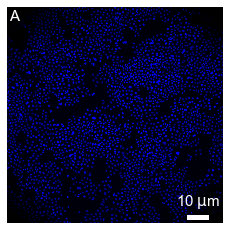

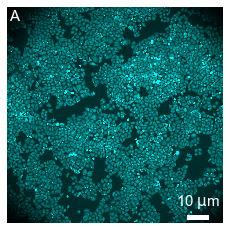

In [21]:
sbs_tiff_files_single = glob.glob(os.path.join(home, "input_sbs/process/input/10X", "*.tif"))

# Iterate through the list of sbs_tiff_files, find one random one in test_cycle
for file_path in sbs_tiff_files_single:
    # Check if all substrings (test_well, test_cycle, test_tile) are present in the file name
    if all(substring in file_path for substring in [test_well, test_cycle, f"Tile-{sbs_tiles[0]}.sbs"]):
        # Print file path
        print(file_path)
        # Read the multi-page TIFF image
        sbs_image = tifffile.imread(file_path)
        print(sbs_image.shape)
        break
        
# Iterate through the list of sbs_tiff_files, find one random one in test_cycle
for file_path in sbs_tiff_files_single:
    # Check if all substrings (test_well, test_cycle, test_tile) are present in the file name
    if all(substring in file_path for substring in [test_well, 'c1', 'Dapi_1p', f"Tile-{sbs_tiles[0]}.sbs"]):
        # Print file path
        print(file_path)
        # Read the multi-page TIFF image
        sbs_image_dapi = tifffile.imread(file_path)
        print(sbs_image.shape)
        break

# Set channel order based on what image you get
channel_order_sbs = ['Dapi_1p', 'CY7_30p']

# Define custom display ranges for each channel
DISPLAY_RANGES = [
    [500, 5000],
    [200, 20000]
]

# Create microshow plots for each channel with specified colormaps and display ranges
microim0_sbs_single = microplot.microshow(sbs_image_dapi, 
                               cmaps='pure_blue', 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[0], 
                               label_text='A', 
                               channel_names=channel_order_sbs[0],
                                unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=10,
                              scalebar_font_size=15, scalebar_thickness=0.02)

# Create microshow plots for each channel with specified colormaps and display ranges
microim1_sbs_single = microplot.microshow(sbs_image, 
                               cmaps='pure_cyan', 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[1], 
                               label_text='A', 
                               channel_names=channel_order_sbs[1],
                                unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=10,
                              scalebar_font_size=15, scalebar_thickness=0.02)

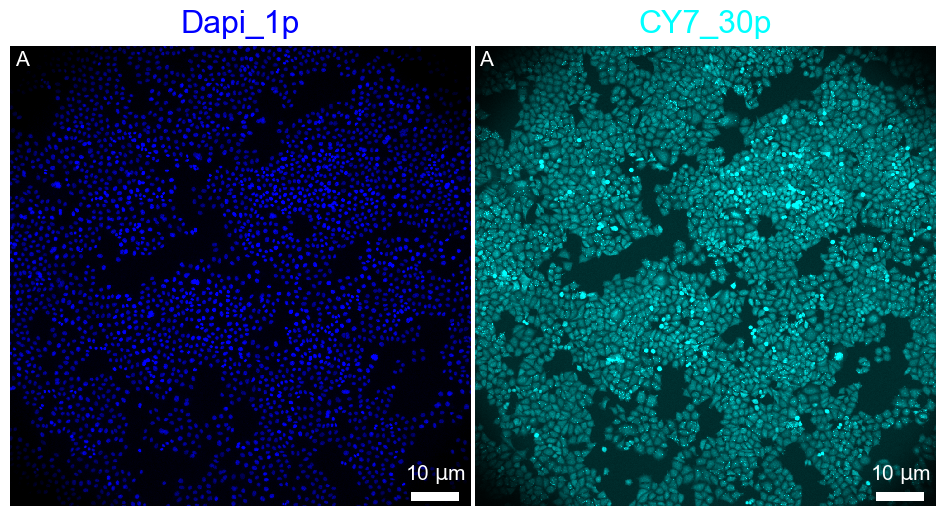

In [22]:
panel = Micropanel(rows=1, cols=2, figscaling=5)
panel.add_element([0,0], microim0_sbs_single);
panel.add_element([0,1], microim1_sbs_single);
panel.add_channel_label()

### Load multidimensional images, and check if they rotationally are logical

/lab/barcheese01/screens/baker/input_sbs/process/input/10X/multidimensional/10X_c4-SBS-4_A1_Tile-1.sbs.tif
(5, 1480, 1480)


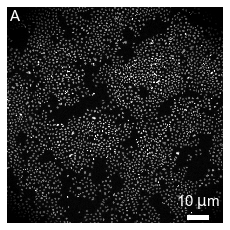

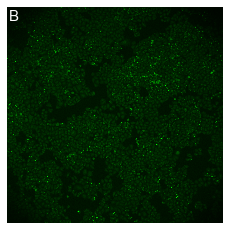

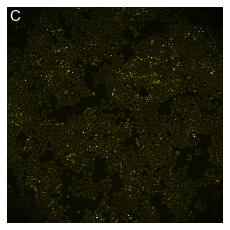

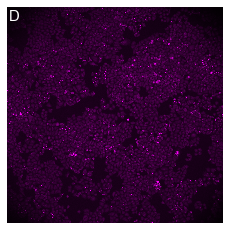

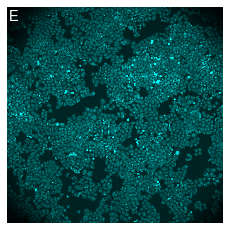

In [23]:
# Iterate through the list of sbs_tiff_files
for file_path in sbs_tiff_files:
    # Check if all substrings (test_well, test_cycle, test_tile) are present in the file name
    if all(substring in file_path for substring in [test_well, test_cycle, f"Tile-{sbs_tiles[0]}.sbs"]):
        # Print file path
        print(file_path)
        # Read the multi-page TIFF image
        sbs_image = tifffile.imread(file_path)
        print(sbs_image.shape)
        break

# Define channel order and colors
channel_order_sbs = ['Dapi_1p', 'CY3_30p_545', 'A594_30p', 'CY5_30p', 'CY7_30p']
cmaps = ['pure_blue', 'pure_green', 'pure_yellow', 'pure_magenta', 'pure_cyan']
DISPLAY_RANGES = [
    [500, 7500],
    [100, 10000],
    [100, 10000],
    [200, 25000],
    [200, 25000]
]

# Create microshow plots for each channel with specified colormaps and display ranges
microim0_sbs = microplot.microshow(sbs_image[0], 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[0], 
                               label_text='A', 
                               channel_names=channel_order_sbs[0],
                                unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=10,
                              scalebar_font_size=15, scalebar_thickness=0.02)

microim1_sbs = microplot.microshow(sbs_image[1], 
                               cmaps=cmaps[1], 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[1], 
                               label_text='B', 
                               channel_names=channel_order_sbs[1])

microim2_sbs = microplot.microshow(sbs_image[2], 
                               cmaps=cmaps[2], 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[2], 
                               label_text='C', 
                               channel_names=channel_order_sbs[2])

microim3_sbs = microplot.microshow(sbs_image[3], 
                               cmaps=cmaps[3], 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[3], 
                               label_text='D', 
                               channel_names=channel_order_sbs[3])

microim4_sbs = microplot.microshow(sbs_image[4], 
                               cmaps=cmaps[4], 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[4], 
                               label_text='E', 
                               channel_names=channel_order_sbs[4])


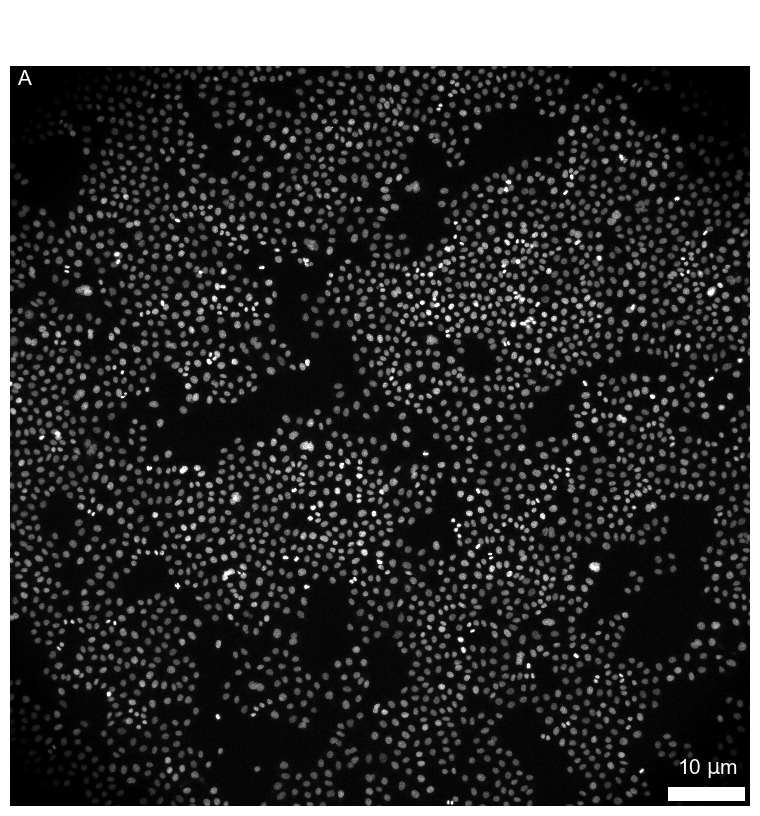

In [24]:
panel_dapi = Micropanel(rows=1, cols=1, figscaling=8)
panel_dapi.add_element([0,0], microim0_sbs);
panel_dapi.add_channel_label()

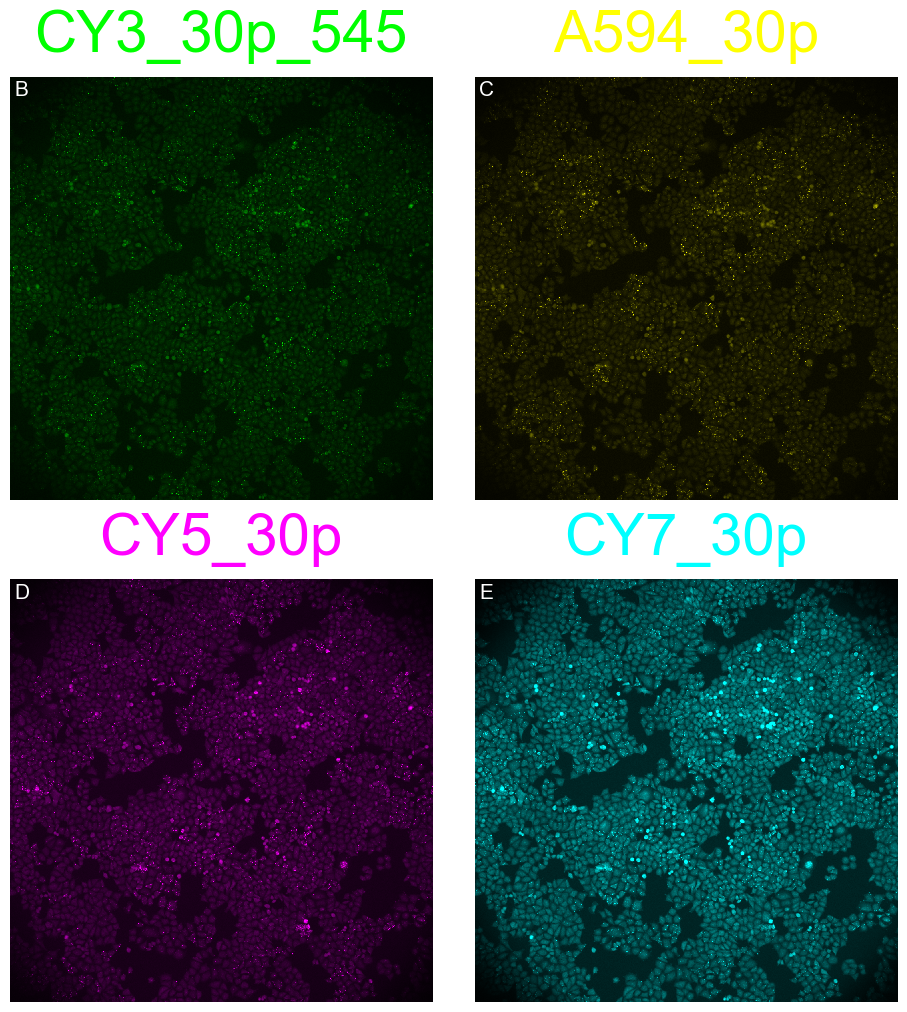

In [25]:
panel = Micropanel(rows=2, cols=2, figscaling=5)
panel.add_element([0,0], microim1_sbs);
panel.add_element([0,1], microim2_sbs);
panel.add_element([1,0], microim3_sbs);
panel.add_element([1,1], microim4_sbs);
panel.add_channel_label()

/lab/barcheese01/screens/baker/input_ph/process/input/20X/multidimensional/20X_A1_Tile-1.phenotype.tif
(4, 2960, 2960)


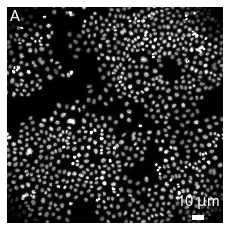

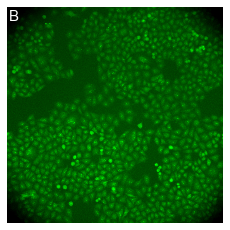

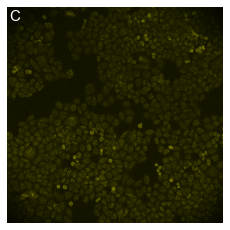

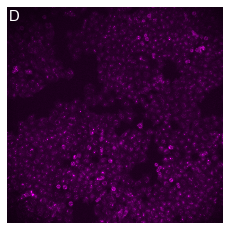

In [26]:
# Iterate through the list of sbs_tiff_files
for file_path in ph_tiff_files:
    # Check if all substrings (test_well, test_cycle, test_tile) are present in the file name
    if all(substring in file_path for substring in [test_well, f"Tile-{sbs_tiles[0]}.phenotype"]):

        # Print file path
        print(file_path)
        # Read the multi-page TIFF image
        ph_image = tifffile.imread(file_path)
        print(ph_image.shape)
        break

# Define channel order and colors
channel_order_ph = ['DAPI 1x1 LF', 'GFP 1x1 LF', 'A594 1x1 LF', 'A750_1x1_LF']
cmaps = ['pure_blue', 'pure_green', 'pure_yellow', 'pure_magenta']
DISPLAY_RANGES = [
    [500, 10000],
    [1000, 10000],
    [100, 7500],
    [100, 7500]
]

# Create microshow plots for each channel with specified colormaps and display ranges
microim0_ph = microplot.microshow(ph_image[0], 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[0], 
                               label_text='A', 
                               channel_names=channel_order_ph[0],
                                unit='um', scalebar_unit_per_pix=0.065, scalebar_size_in_units=10,
                              scalebar_font_size=15, scalebar_thickness=0.02)

microim1_ph = microplot.microshow(ph_image[1], 
                               cmaps=cmaps[1], 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[1], 
                               label_text='B', 
                               channel_names=channel_order_ph[1])

microim2_ph = microplot.microshow(ph_image[2], 
                               cmaps=cmaps[2], 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[2], 
                               label_text='C', 
                               channel_names=channel_order_ph[2])

microim3_ph = microplot.microshow(ph_image[3], 
                               cmaps=cmaps[3], 
                               rescale_type='limits', 
                               limits=DISPLAY_RANGES[3], 
                               label_text='D', 
                               channel_names=channel_order_ph[3])

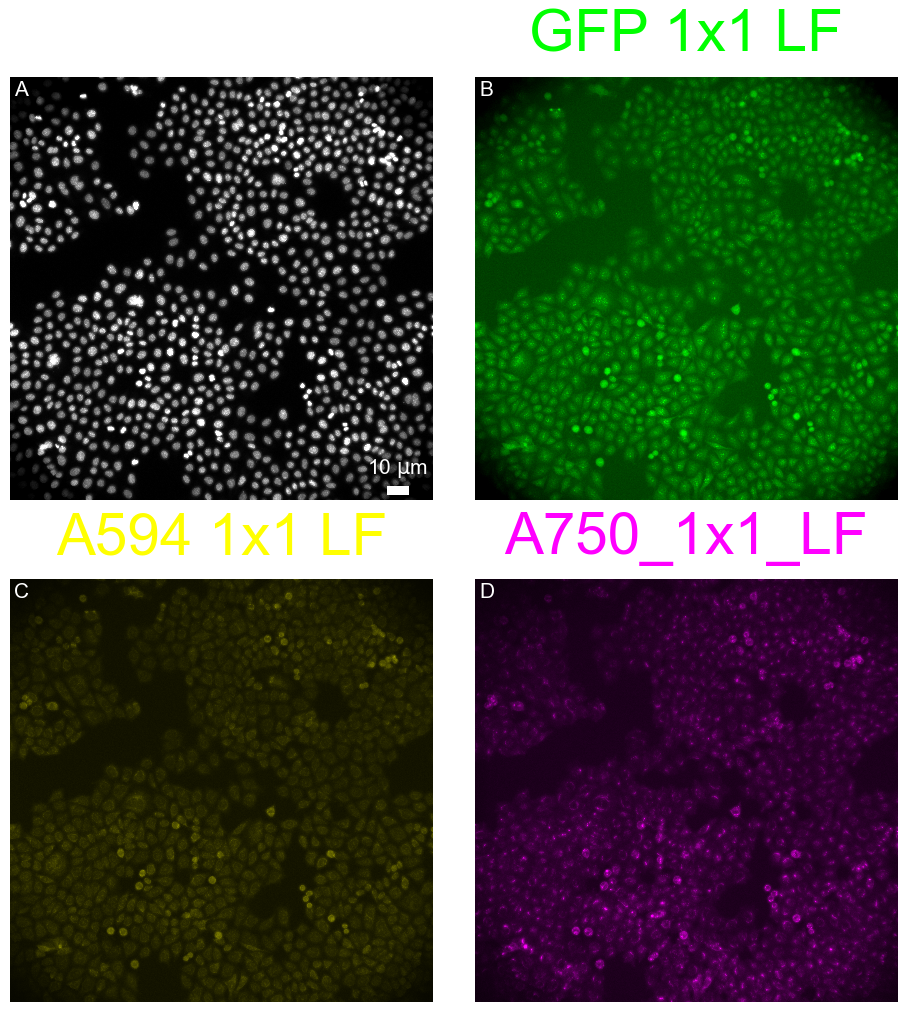

In [27]:
panel = Micropanel(rows=2, cols=2, figscaling=5)
panel.add_element([0,0], microim0_ph);
panel.add_element([0,1], microim1_ph);
panel.add_element([1,0], microim2_ph);
panel.add_element([1,1], microim3_ph);
panel.add_channel_label()

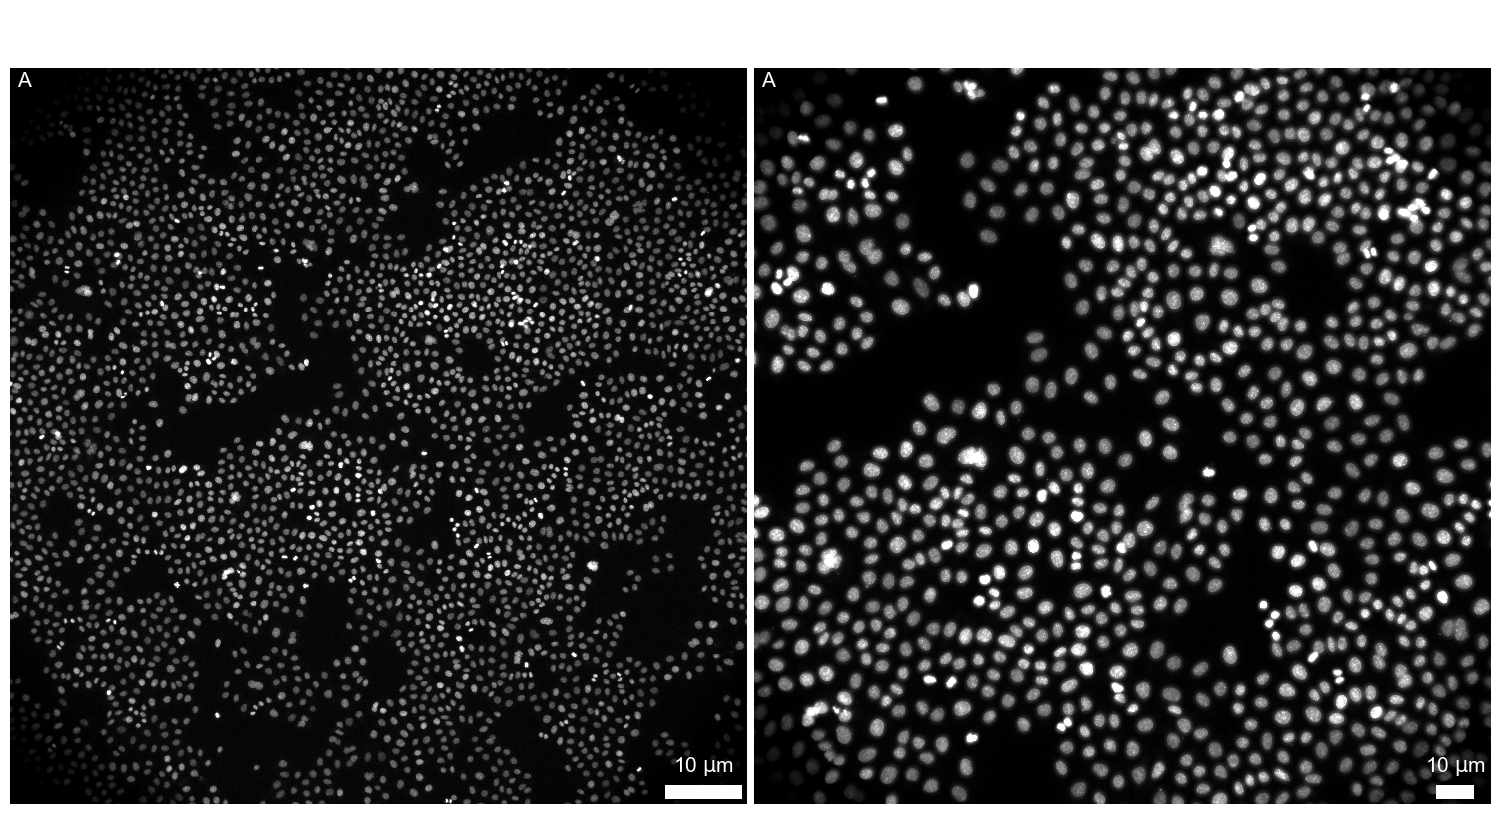

In [28]:
panel_dapi_merged = Micropanel(rows=1, cols=2, figscaling=8)
panel_dapi_merged.add_element([0,0], microim0_sbs);
panel_dapi_merged.add_element([0,1], microim0_ph);
panel_dapi_merged.add_channel_label()
# Combine channel name and tile number strings, and add file extension
filename = "merged_dapi.png"

# Save the figure using the combined filename
panel_dapi_merged.savefig(filename, format='png')